In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
np.set_printoptions(suppress=True)

In [6]:
data = pd.read_csv('train.csv')

In [7]:
data.shape

(233154, 41)

In [8]:
recnik = pd.read_csv('data_dictionary.csv')

In [9]:
data.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [10]:
for col in data.columns:
    print(f"{col}: {data[col].nunique()}, {data[col].dtype}")

UniqueID: 233154, int64
disbursed_amount: 24565, int64
asset_cost: 46252, int64
ltv: 6579, float64
branch_id: 82, int64
supplier_id: 2953, int64
manufacturer_id: 11, int64
Current_pincode_ID: 6698, int64
Date.of.Birth: 15433, object
Employment.Type: 2, object
DisbursalDate: 84, object
State_ID: 22, int64
Employee_code_ID: 3270, int64
MobileNo_Avl_Flag: 1, int64
Aadhar_flag: 2, int64
PAN_flag: 2, int64
VoterID_flag: 2, int64
Driving_flag: 2, int64
Passport_flag: 2, int64
PERFORM_CNS.SCORE: 573, int64
PERFORM_CNS.SCORE.DESCRIPTION: 20, object
PRI.NO.OF.ACCTS: 108, int64
PRI.ACTIVE.ACCTS: 40, int64
PRI.OVERDUE.ACCTS: 22, int64
PRI.CURRENT.BALANCE: 71341, int64
PRI.SANCTIONED.AMOUNT: 44390, int64
PRI.DISBURSED.AMOUNT: 47909, int64
SEC.NO.OF.ACCTS: 37, int64
SEC.ACTIVE.ACCTS: 23, int64
SEC.OVERDUE.ACCTS: 9, int64
SEC.CURRENT.BALANCE: 3246, int64
SEC.SANCTIONED.AMOUNT: 2223, int64
SEC.DISBURSED.AMOUNT: 2553, int64
PRIMARY.INSTAL.AMT: 28067, int64
SEC.INSTAL.AMT: 1918, int64
NEW.ACCTS.IN.LAST

In [11]:
data.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [12]:
numVar = data.select_dtypes('int64').columns.to_list()
numVar.append('ltv')

In [13]:
numVar

['UniqueID',
 'disbursed_amount',
 'asset_cost',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'loan_default',
 'ltv']

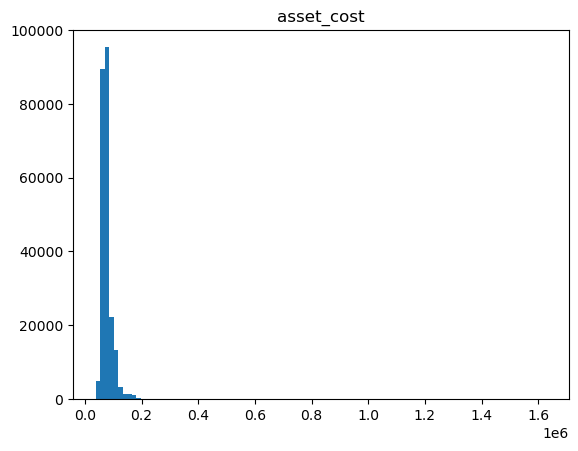

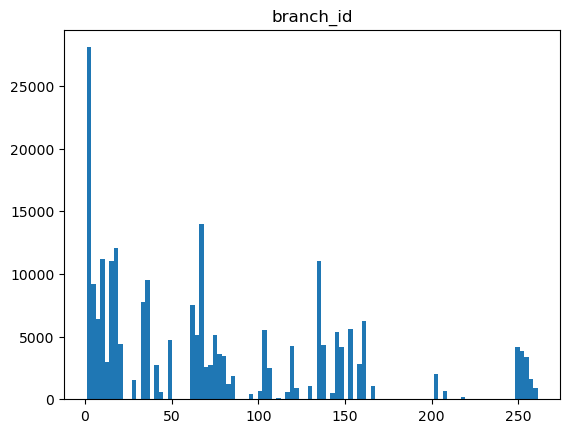

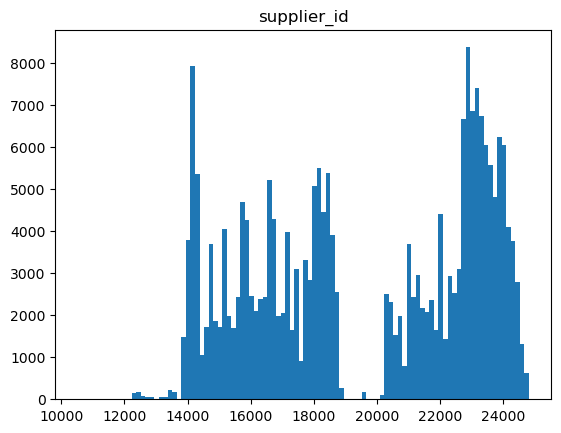

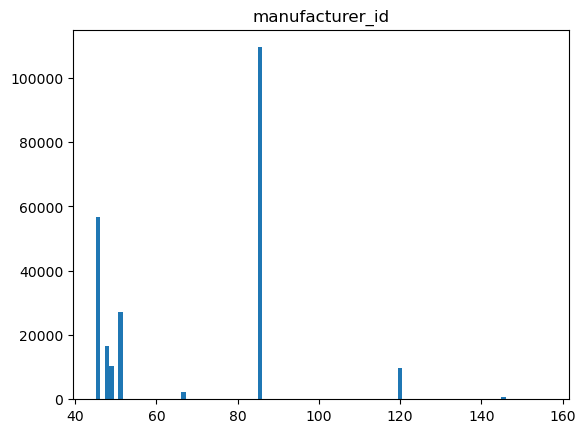

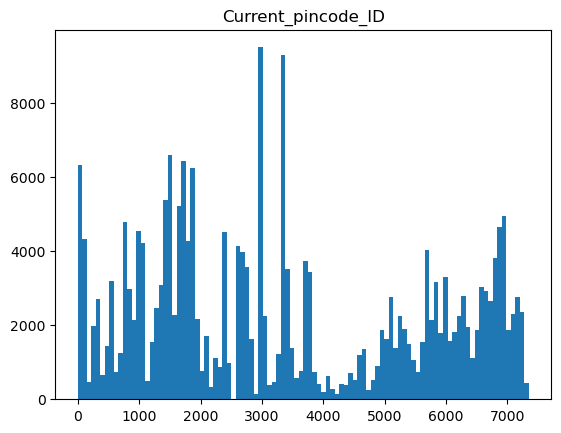

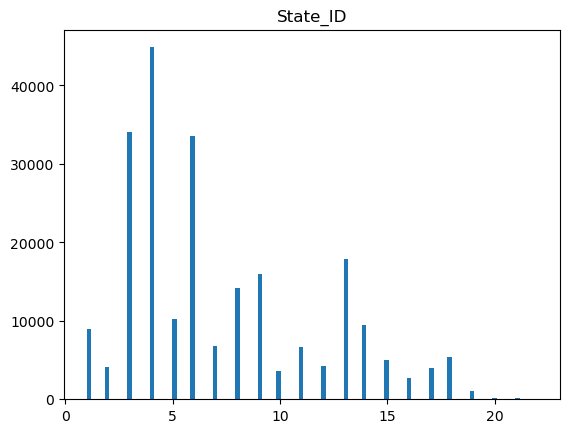

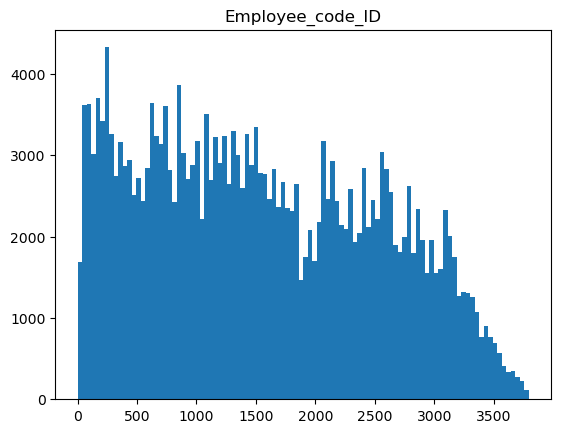

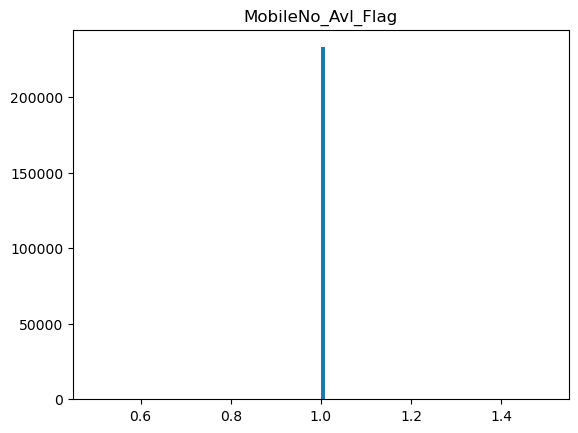

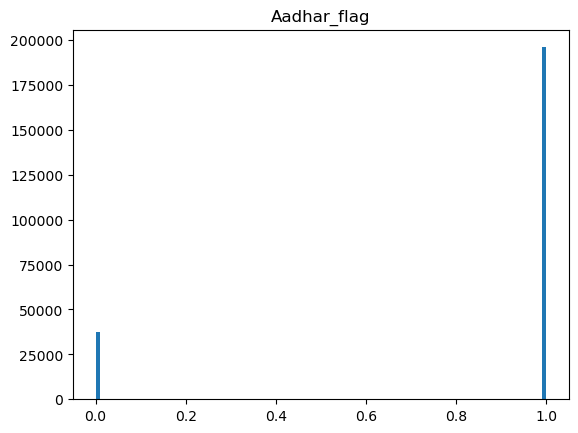

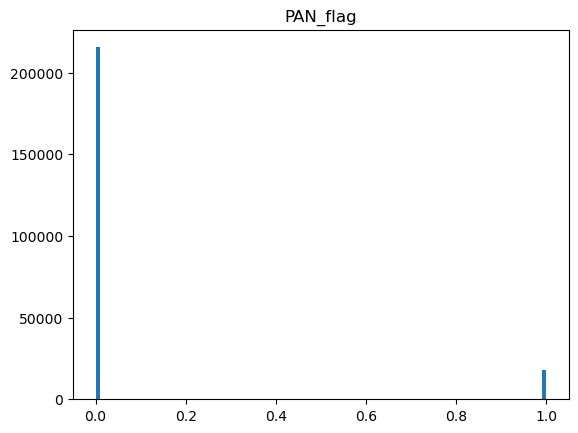

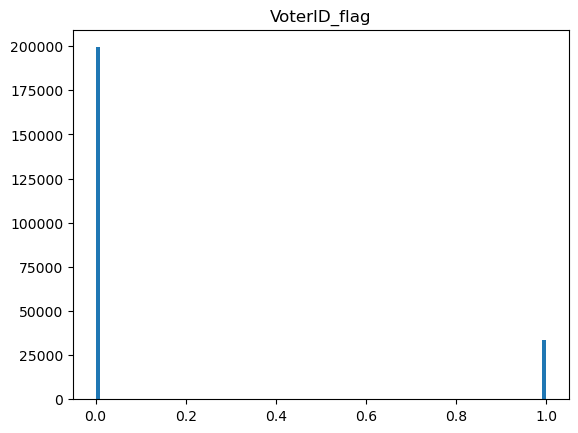

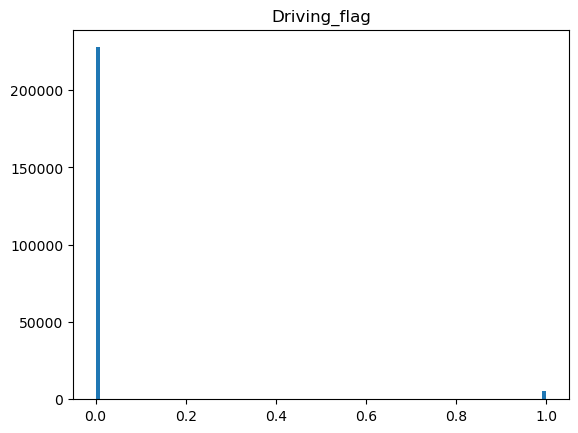

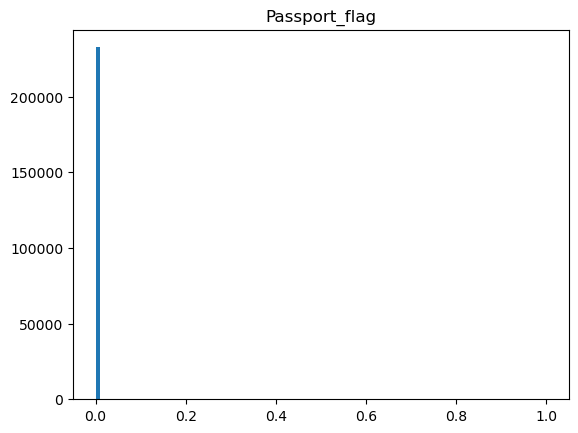

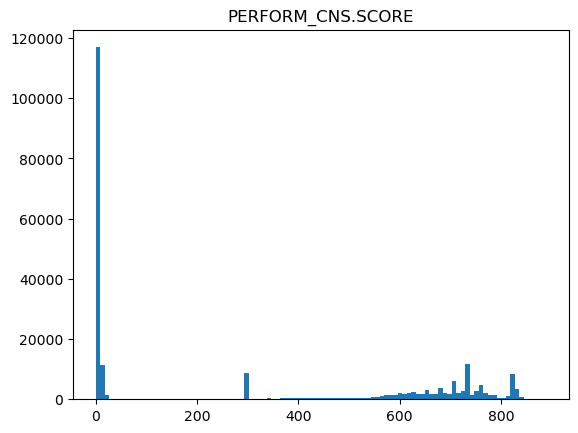

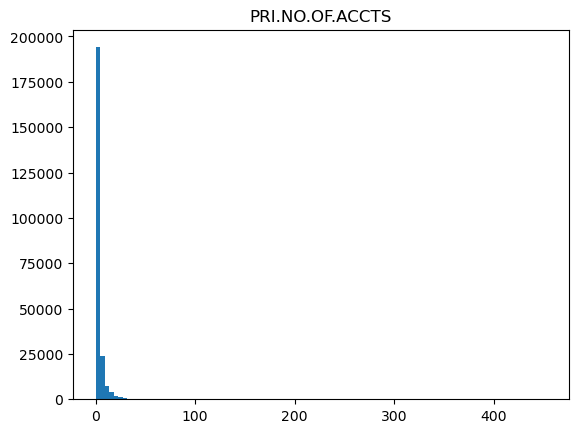

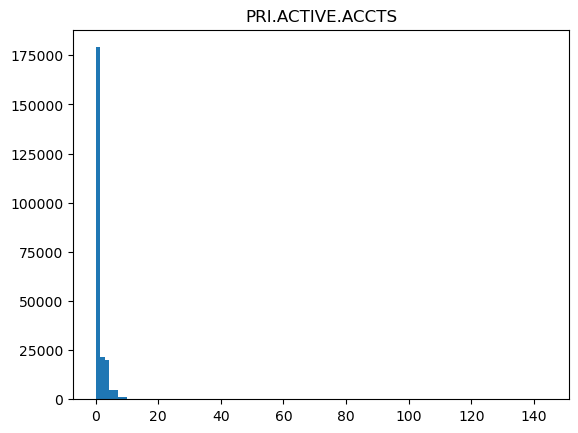

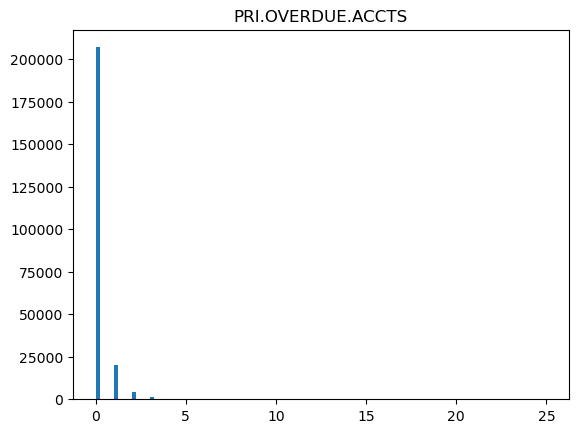

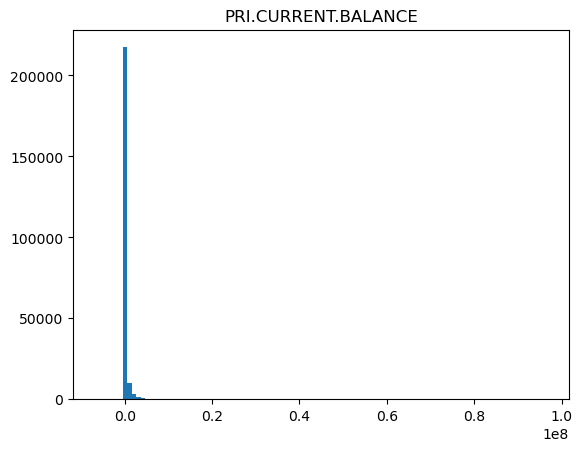

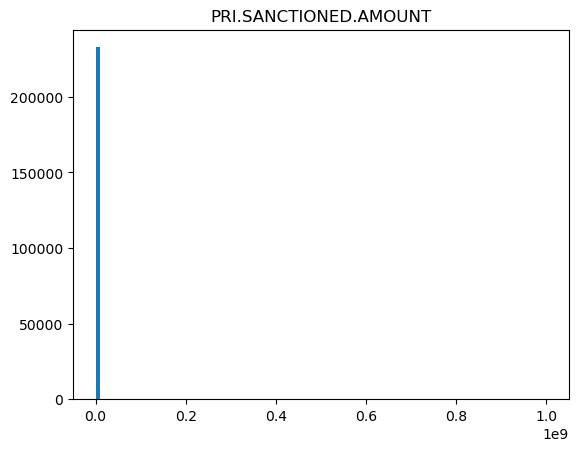

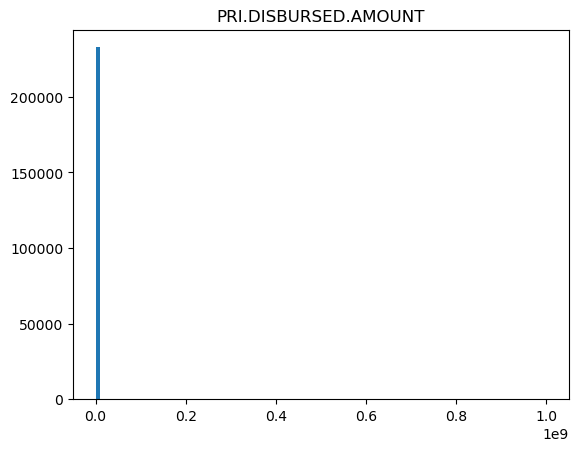

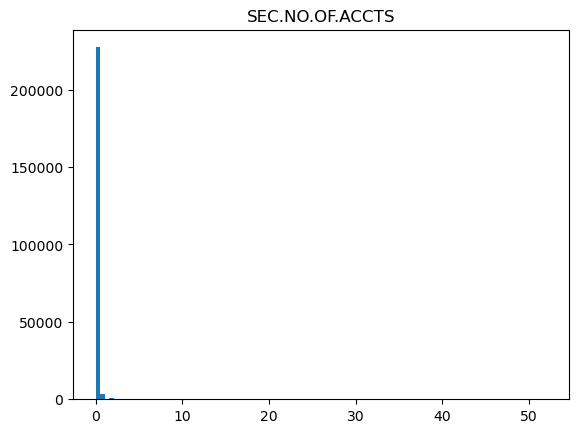

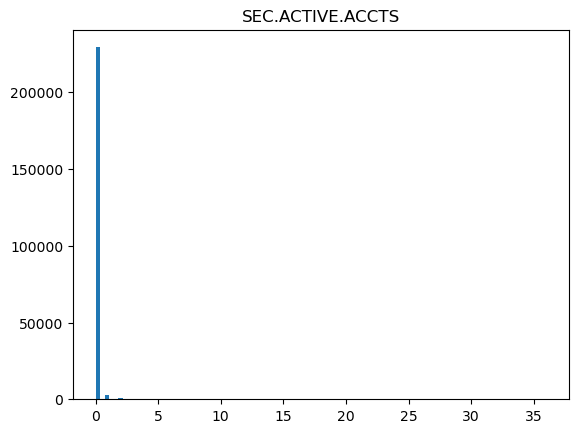

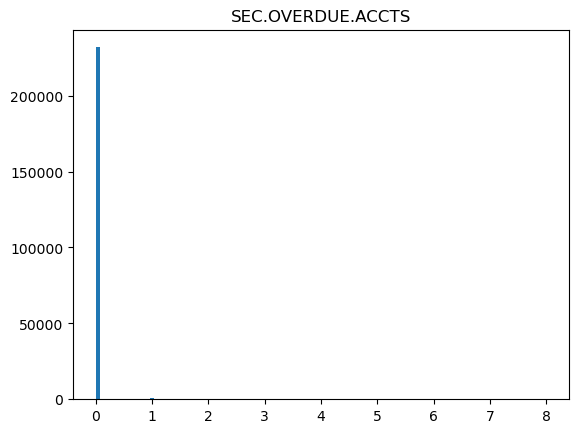

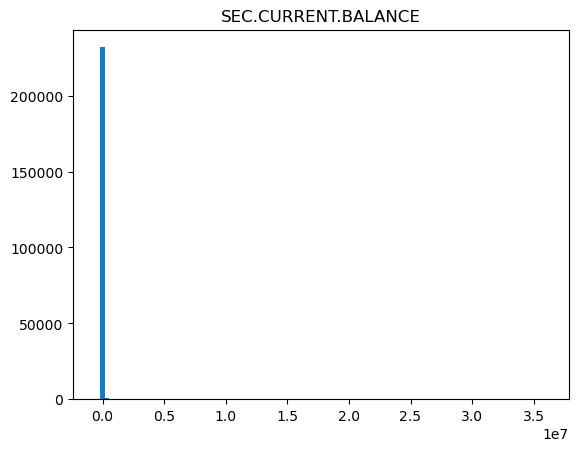

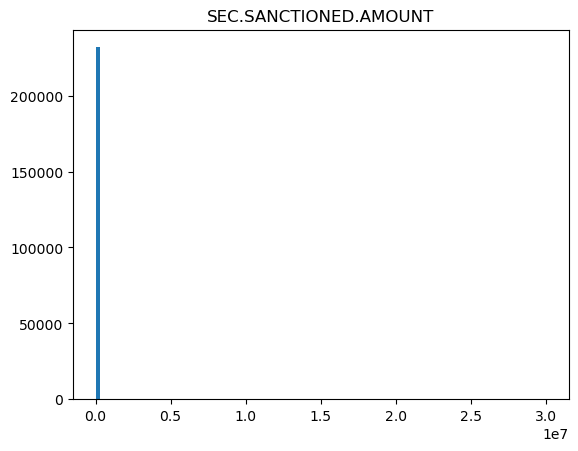

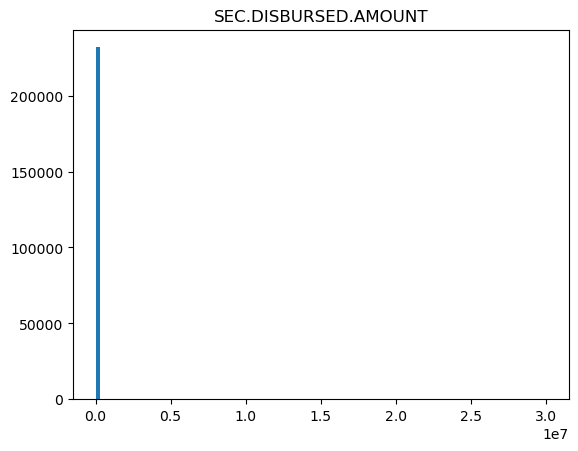

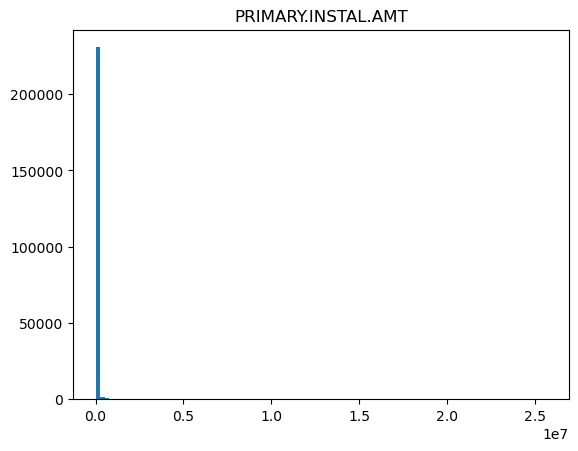

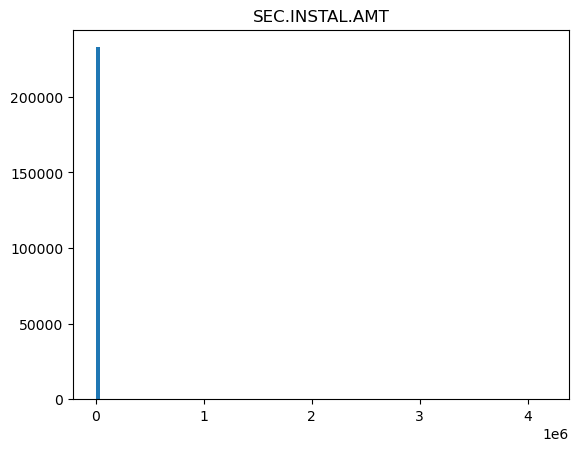

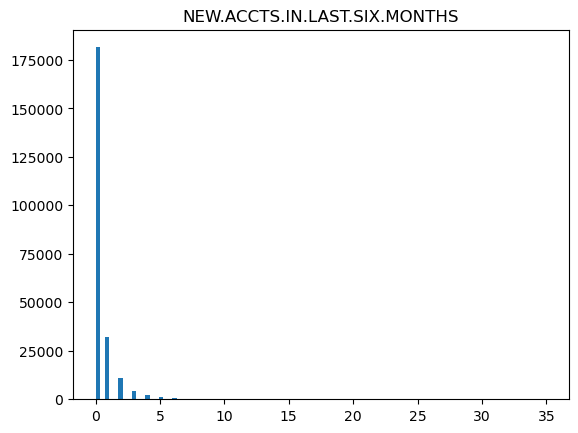

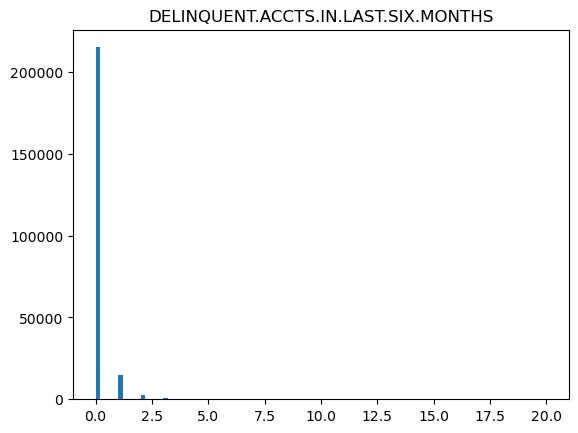

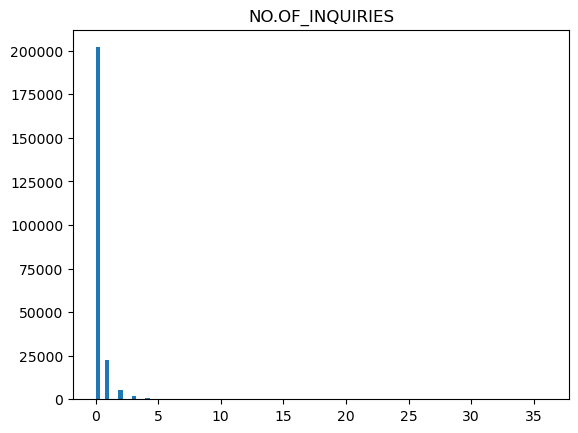

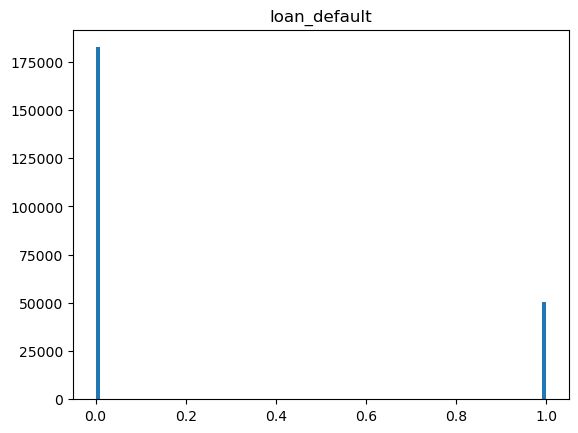

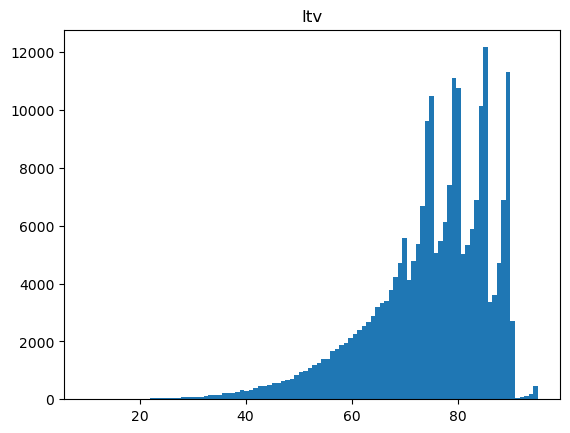

In [14]:
for var in numVar[2:]:
    plt.hist(data[var], bins=100)
    plt.title(var)
    plt.show()

In [15]:
katVar = data.select_dtypes('object').columns

for var in katVar:
    print(data[var].value_counts())

01-01-88    2173
01-01-90    2170
01-01-87    2127
01-01-86    2063
01-01-85    2005
            ... 
02-07-00       1
21-02-63       1
23-03-59       1
24-09-67       1
08-12-62       1
Name: Date.of.Birth, Length: 15433, dtype: int64
Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64
31-10-18    8826
24-10-18    6701
31-08-18    6690
23-10-18    6440
26-10-18    6215
25-10-18    5944
22-10-18    5928
30-10-18    5837
30-08-18    4664
29-10-18    4389
27-10-18    4273
29-08-18    3942
20-09-18    3910
14-09-18    3806
28-09-18    3733
29-09-18    3700
21-10-18    3693
28-08-18    3665
19-09-18    3611
30-09-18    3601
20-10-18    3488
21-09-18    3381
13-10-18    3312
25-09-18    3295
17-08-18    3167
27-09-18    3152
16-08-18    3145
26-09-18    3114
22-08-18    3093
15-10-18    3024
08-10-18    2979
21-08-18    2791
20-08-18    2784
24-08-18    2703
16-10-18    2700
18-09-18    2687
14-08-18    2686
23-08-18    2647
12-10-18    2616
24-09-18    2573


In [16]:
vrednosti = data['PERFORM_CNS.SCORE.DESCRIPTION'].unique()
brojPojavljivanja =  data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

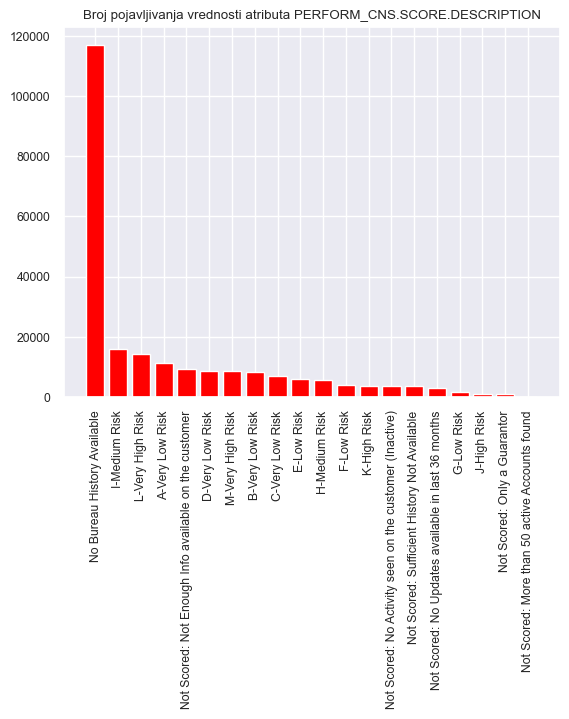

In [17]:
sb.set(font_scale=0.8)
plt.bar(vrednosti, brojPojavljivanja, color='red')
plt.title('Broj pojavljivanja vrednosti atributa PERFORM_CNS.SCORE.DESCRIPTION')
plt.xticks(rotation=90)
plt.show()

In [18]:
def stringUMesece(godMes:str):
    
    god, mes = godMes.split()
    god = god.rstrip('yrs')
    god = int(god)
    mes = mes.rstrip('mon')
    mes = int(mes)
    
    return god*12 + mes

In [19]:
data["AVERAGE.ACCT.AGE"] = data["AVERAGE.ACCT.AGE"].apply(stringUMesece)
data["CREDIT.HISTORY.LENGTH"] = data["CREDIT.HISTORY.LENGTH"].apply(stringUMesece)

In [20]:
data.sample(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
116700,618606,80686,106952,77.42,67,20582,86,1476,22-04-93,Salaried,25-10-18,6,953,1,1,0,1,0,0,737,C-Very Low Risk,1,1,0,22845,48774,48774,0,0,0,0,0,0,0,0,0,0,14,14,0,1
213906,595596,62213,74020,85.11,202,24115,45,782,11-06-92,Self employed,21-10-18,18,3087,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
140353,633583,71417,85513,84.90,82,18559,86,4869,01-05-71,Salaried,28-10-18,19,508,1,1,0,0,0,0,300,M-Very High Risk,17,6,3,1855484,2028500,2028500,0,0,0,0,0,0,156902,0,1,1,20,44,0,1
13430,498729,47849,74937,65.39,63,16309,45,7092,02-02-88,Self employed,10-09-18,10,1397,1,1,0,0,0,0,655,F-Low Risk,3,1,0,37707,30000,30000,0,0,0,0,0,0,0,0,0,0,20,29,0,0
147440,481317,47009,64459,74.47,35,21557,86,4323,08-06-93,Salaried,31-08-18,8,789,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [21]:
from datetime import datetime, date, timedelta

In [22]:
def brojProteklihDana(datumStr:str):
    
    danas = datetime.today().date()
    datum = datetime.strptime(datumStr, "%d-%m-%y").date()
    
    brojDana = (danas - datum).days
    
    return brojDana

In [23]:
def brojGodina(datumStr:str):
    
    danas = datetime.today().date()
    datum = datetime.strptime(datumStr, "%d-%m-%y").date()
    
    if datum.year > 2023:
        brGod = danas.year - (datum.year - 100)
    else:
        brGod = danas.year - datum.year
    
    if (danas.month < datum.month) or (danas.month == datum.month and danas.day < datum.day):
        brGod -= 1
    
    return brGod

In [24]:
data['DisbursalDate'] = data['DisbursalDate'].apply(brojProteklihDana)

In [25]:
data['Date.of.Birth'] = data['Date.of.Birth'].apply(brojGodina)

In [26]:
data.rename(columns={
    'DisbursalDate' : 'DaysPastSinceDisbursal',
    'Date.of.Birth' : 'AgeOfCustomer'
}, inplace=True)

In [27]:
data.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
AgeOfCustomer                            int64
Employment.Type                         object
DaysPastSinceDisbursal                   int64
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [28]:
data['Employment.Type'].isna().sum()

7661

In [29]:
data['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

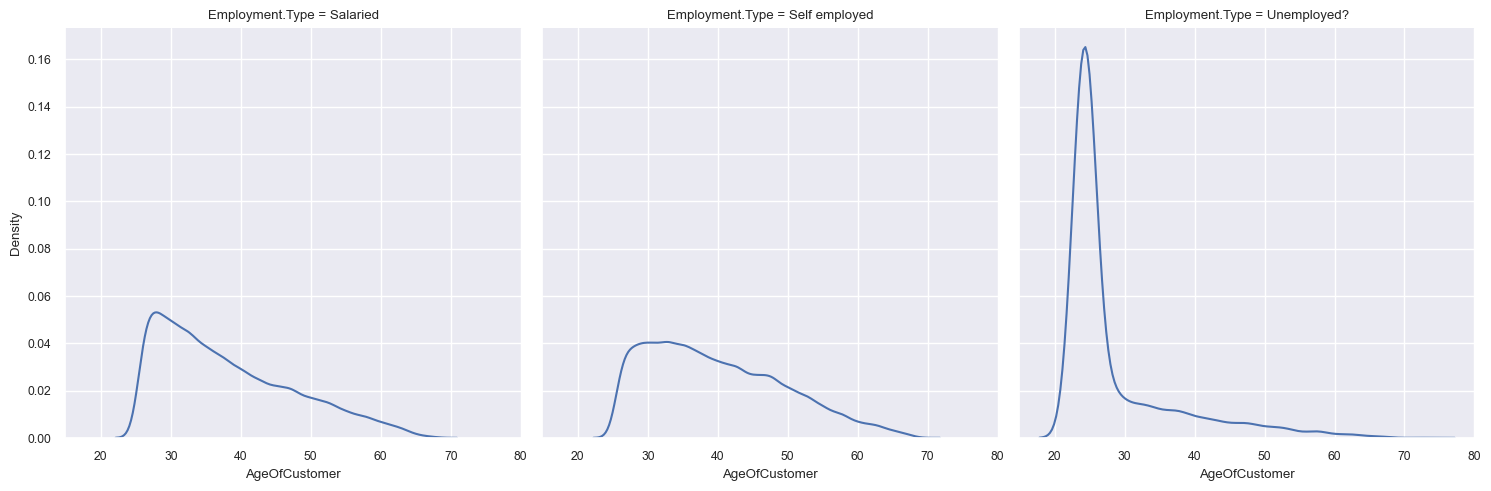

In [30]:
sb.displot(data=data.fillna("Unemployed?"), x='AgeOfCustomer', kind='kde', col='Employment.Type', common_norm=False);

In [31]:
data.loc[data['Employment.Type'].isna(), "Employment.Type"] = "Unemployed"

In [32]:
data['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Unemployed         7661
Name: Employment.Type, dtype: int64

In [33]:
data['Employment.Type'].isna().sum()

0

In [34]:
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

### Izvedene nove kategorije za atribut PERFORM_CNS.SCORE.DESCRIPTION

In [35]:
data.loc[(data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains("No Bureau History Available")) | 
         (data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains("Not Scored")), "PERFORM_CNS.SCORE.DESCRIPTION"] = "Not Scored"

In [36]:
data.loc[(data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains("Very Low Risk")), 'PERFORM_CNS.SCORE.DESCRIPTION'] = "Very Low Risk"
data.loc[(data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains("Medium Risk")), 'PERFORM_CNS.SCORE.DESCRIPTION'] = "Medium Risk"
data.loc[(data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains("Low Risk")) & (~data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains("Very")), 'PERFORM_CNS.SCORE.DESCRIPTION'] = "Low Risk"
data.loc[(data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains("High Risk")) & (~data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains("Very")), 'PERFORM_CNS.SCORE.DESCRIPTION'] = "High Risk"
data.loc[(data['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains("Very High Risk")), 'PERFORM_CNS.SCORE.DESCRIPTION'] = "Very High Risk"

In [37]:
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

Not Scored        129785
Very Low Risk      50728
Low Risk           18294
Medium Risk        12412
High Risk          12025
Very High Risk      9910
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [38]:
vrednosti2 = data['PERFORM_CNS.SCORE.DESCRIPTION'].unique()
brojPojavljivanja2 =  data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

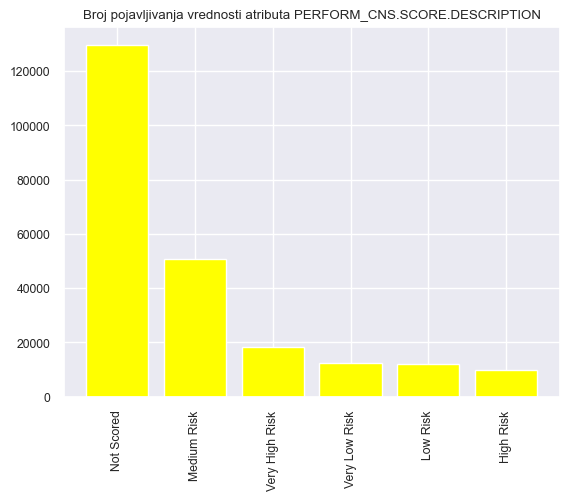

In [39]:
plt.bar(vrednosti2, brojPojavljivanja2, color='yellow')
plt.title('Broj pojavljivanja vrednosti atributa PERFORM_CNS.SCORE.DESCRIPTION')
plt.xticks(rotation=90)
plt.show()

In [40]:
data.isna().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
AgeOfCustomer                          0
Employment.Type                        0
DaysPastSinceDisbursal                 0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [41]:
data.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
AgeOfCustomer                              49
Employment.Type                             3
DaysPastSinceDisbursal                     84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION               6
PRI.NO.OF.ACCTS                   

In [42]:
# izbacicemo ove kolone koje su defakto kategorickog tipa i imaju previse razlicitih vrednosti za dalje koriscenje

data.drop(columns=['UniqueID', 'supplier_id', 'Current_pincode_ID', 'Employee_code_ID'], inplace=True)

In [43]:
data['MobileNo_Avl_Flag'].sample(5)

21703     1
157737    1
143824    1
7333      1
142804    1
Name: MobileNo_Avl_Flag, dtype: int64

In [44]:
data['MobileNo_Avl_Flag'].value_counts()

1    233154
Name: MobileNo_Avl_Flag, dtype: int64

In [45]:
data.drop(columns='MobileNo_Avl_Flag', inplace=True)

In [46]:
data.sample(5)

,disbursed_amount,asset_cost,ltv,branch_id,manufacturer_id,AgeOfCustomer,Employment.Type,DaysPastSinceDisbursal,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
214627,60652,73000,85.00,18,86,61,Self employed,1756,4,0,0,1,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22318,62213,85032,75.27,19,86,29,Salaried,1715,4,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
67521,55263,68612,83.08,74,86,33,Self employed,1726,4,1,0,0,0,0,540,High Risk,5,3,0,279702,239900,239900,0,0,0,0,0,0,8730,0,3,1,4,7,0,1
4481,31902,67123,50.00,65,45,38,Self employed,1782,13,0,0,1,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
98519,51653,68283,80.55,3,86,46,Salaried,1755,15,1,0,0,0,0,810,Very Low Risk,4,2,0,0,55000,10180,0,0,0,0,0,0,0,0,0,0,11,14,0,0


In [47]:
data.nunique()

disbursed_amount                       24565
asset_cost                             46252
ltv                                     6579
branch_id                                 82
manufacturer_id                           11
AgeOfCustomer                             49
Employment.Type                            3
DaysPastSinceDisbursal                    84
State_ID                                  22
Aadhar_flag                                2
PAN_flag                                   2
VoterID_flag                               2
Driving_flag                               2
Passport_flag                              2
PERFORM_CNS.SCORE                        573
PERFORM_CNS.SCORE.DESCRIPTION              6
PRI.NO.OF.ACCTS                          108
PRI.ACTIVE.ACCTS                          40
PRI.OVERDUE.ACCTS                         22
PRI.CURRENT.BALANCE                    71341
PRI.SANCTIONED.AMOUNT                  44390
PRI.DISBURSED.AMOUNT                   47909
SEC.NO.OF.

In [48]:
data.branch_id.sample(10)

173621    138
177648    136
55964      64
187019    103
118228    159
111179      5
168923    138
11615      34
137666     76
123927    120
Name: branch_id, dtype: int64

In [49]:
# pretvaramo numericki tip u kategoricki jer se radi o ID podacima koji su nominalni

for kol in ['branch_id', 'manufacturer_id', 'State_ID']:
    data[kol] = data[kol].astype(str)

In [50]:
data.dtypes

disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                               object
manufacturer_id                         object
AgeOfCustomer                            int64
Employment.Type                         object
DaysPastSinceDisbursal                   int64
State_ID                                object
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.ACCTS                        int64
PRI.CURRENT.BALANCE                      int64
PRI.SANCTIONED.AMOUNT                    int64
PRI.DISBURSED

### Enkodiranje kategorickih podataka

In [51]:
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

Not Scored        129785
Very Low Risk      50728
Low Risk           18294
Medium Risk        12412
High Risk          12025
Very High Risk      9910
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [52]:
recnikZamene = {'Very Low Risk': 1, 'Low Risk': 2, 'Medium Risk': 3, 'High Risk': 4, 'Very High Risk': 5, 'Not Scored': 6}

data['PERFORM_CNS.SCORE.DESCRIPTION'].replace(recnikZamene, inplace=True)

In [53]:
katVar = data.select_dtypes('object').columns.to_list()

In [54]:
# branch_id cemo izbaciti posle da proverimo da li se model poboljsao

katVar

['branch_id', 'manufacturer_id', 'Employment.Type', 'State_ID']

In [84]:
 data['manufacturer_id'].value_counts(normalize=True)

86     0.469792
45     0.242870
51     0.116678
48     0.071669
49     0.043834
120    0.041423
67     0.010315
145    0.003337
153    0.000051
152    0.000026
156    0.000004
Name: manufacturer_id, dtype: float64

In [85]:
 data['Employment.Type'].value_counts(normalize=True)

Self employed    0.547428
Salaried         0.419714
Unemployed       0.032858
Name: Employment.Type, dtype: float64

In [86]:
 data['State_ID'].value_counts(normalize=True)

4     0.192448
3     0.146161
6     0.143703
13    0.076705
9     0.068719
8     0.060891
5     0.043649
14    0.040377
1     0.038327
7     0.029105
11    0.028826
18    0.023212
15    0.021655
12    0.018057
2     0.017842
17    0.017117
10    0.015462
16    0.011516
19    0.004439
20    0.000793
21    0.000669
22    0.000326
Name: State_ID, dtype: float64

In [87]:
 data['Aadhar_flag'].value_counts(normalize=True)

1    0.84032
0    0.15968
Name: Aadhar_flag, dtype: float64

In [88]:
 data['Driving_flag'].value_counts(normalize=True)

0    0.976758
1    0.023242
Name: Driving_flag, dtype: float64

In [89]:
 data['PAN_flag'].value_counts(normalize=True)

0    0.924423
1    0.075577
Name: PAN_flag, dtype: float64

In [55]:
enkodiranaData = pd.get_dummies(data, columns = katVar)

In [56]:
enkodiranaData.sample(5)

,disbursed_amount,asset_cost,ltv,AgeOfCustomer,DaysPastSinceDisbursal,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,branch_id_1,branch_id_10,branch_id_100,branch_id_101,branch_id_103,branch_id_104,branch_id_105,branch_id_11,branch_id_111,branch_id_117,branch_id_120,branch_id_121,branch_id_13,branch_id_130,branch_id_135,branch_id_136,branch_id_138,branch_id_14,branch_id_142,branch_id_146,branch_id_147,branch_id_15,branch_id_152,branch_id_153,branch_id_158,branch_id_159,branch_id_16,branch_id_160,branch_id_162,branch_id_165,branch_id_17,branch_id_18,branch_id_19,branch_id_2,branch_id_20,branch_id_202,branch_id_207,branch_id_217,branch_id_248,branch_id_249,branch_id_250,branch_id_251,branch_id_254,branch_id_255,branch_id_257,branch_id_258,branch_id_259,branch_id_260,branch_id_261,branch_id_29,branch_id_3,branch_id_34,branch_id_35,branch_id_36,branch_id_42,branch_id_43,branch_id_48,branch_id_5,branch_id_61,branch_id_62,branch_id_63,branch_id_64,branch_id_65,branch_id_66,branch_id_67,branch_id_68,branch_id_69,branch_id_7,branch_id_70,branch_id_72,branch_id_73,branch_id_74,branch_id_76,branch_id_77,branch_id_78,branch_id_79,branch_id_8,branch_id_82,branch_id_84,branch_id_85,branch_id_9,branch_id_97,manufacturer_id_120,manufacturer_id_145,manufacturer_id_152,manufacturer_id_153,manufacturer_id_156,manufacturer_id_45,manufacturer_id_48,manufacturer_id_49,manufacturer_id_51,manufacturer_id_67,manufacturer_id_86,Employment.Type_Salaried,Employment.Type_Self employed,Employment.Type_Unemployed,State_ID_1,State_ID_10,State_ID_11,State_ID_12,State_ID_13,State_ID_14,State_ID_15,State_ID_16,State_ID_17,State_ID_18,State_ID_19,State_ID_2,State_ID_20,State_ID_21,State_ID_22,State_ID_3,State_ID_4,State_ID_5,State_ID_6,State_ID_7,State_ID_8,State_ID_9
176548,41892,58002,74.99,37,1772,1,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
192224,50803,66000,78.03,41,1763,1,0,0,0,0,18,6,1,0,0,0,0,0,0,0,0,0,0,0,1160,0,0,0,13,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
165539,56259,71100,81.58,36,1747,1,0,0,0,0,550,4,2,1,0,404640,350000,350000,0,0,0,0,0,0,0,0,0,1,17,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
210092,77381,122520,64.48,27,1720,1,0,0,0,0,377,4,1,1,1,161837,200000,200000,0,0,0,0,0,0,4668,0,0,0,20,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
127084,50093,71858,73.76,27,1783,1,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [57]:
enkodiranaData.shape

(233154, 150)

# STABLO ODLUCIVANJA

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [59]:
x = enkodiranaData.drop(columns='loan_default')
y = enkodiranaData.loan_default

In [60]:
xtr, xtest, ytr, ytest = train_test_split(x, y, test_size=0.25, random_state=18)

In [414]:
model = DecisionTreeClassifier()

model.fit(xtr, ytr)
pred = model.predict(xtest)

In [415]:
confusion_matrix(ytest, pred)

array([[35680,  9987],
       [ 9098,  3524]], dtype=int64)

In [416]:
print(f"Metrike evaluacije modela: tacnost {round(accuracy_score(ytest, pred), 4)}, preciznost {round(precision_score(ytest, pred), 4)}, odziv {round(recall_score(ytest, pred), 4)}")

Metrike evaluacije modela: tacnost 0.6726, preciznost 0.2608, odziv 0.2792


In [112]:
f1_score(ytest, pred)

0.2711656441717792

In [417]:
roc_auc_score(ytest, pred)

0.5302516109424089

### model nije bas najbolji, probacemo da ga poboljsamo

In [418]:
data2 = data.drop(columns='branch_id')

In [419]:
katVar.remove('branch_id')

In [420]:
enkData2 = pd.get_dummies(data2, columns = katVar)

In [421]:
x = enkodiranaData.drop(columns='loan_default')
y = enkodiranaData.loan_default

In [422]:
xtr, xtest, ytr, ytest = train_test_split(x, y, test_size=0.25, random_state=18)

In [423]:
model = DecisionTreeClassifier()

model.fit(xtr, ytr)
pred = model.predict(xtest)

In [424]:
confusion_matrix(ytest, pred)

array([[35703,  9964],
       [ 9064,  3558]], dtype=int64)

In [425]:
print(f"Metrike evaluacije modela: tacnost {round(accuracy_score(ytest, pred), 4)}, preciznost {round(precision_score(ytest, pred), 4)}, odziv {round(recall_score(ytest, pred), 4)}")

Metrike evaluacije modela: tacnost 0.6736, preciznost 0.2631, odziv 0.2819


In [426]:
roc_auc_score(ytest, pred)

0.5318502886199493

### model je malo bolji, ali ne znacajno

In [427]:
korDf = data.corr()

In [428]:
korDf['loan_default']

disbursed_amount                       0.077675
asset_cost                             0.014261
ltv                                    0.098208
AgeOfCustomer                         -0.036247
DaysPastSinceDisbursal                -0.028131
Aadhar_flag                           -0.041593
PAN_flag                               0.002046
VoterID_flag                           0.043747
Driving_flag                          -0.005821
Passport_flag                         -0.007602
PERFORM_CNS.SCORE                     -0.057929
PERFORM_CNS.SCORE.DESCRIPTION          0.067798
PRI.NO.OF.ACCTS                       -0.035456
PRI.ACTIVE.ACCTS                      -0.041451
PRI.OVERDUE.ACCTS                      0.040872
PRI.CURRENT.BALANCE                   -0.027386
PRI.SANCTIONED.AMOUNT                 -0.011304
PRI.DISBURSED.AMOUNT                  -0.011155
SEC.NO.OF.ACCTS                       -0.008385
SEC.ACTIVE.ACCTS                      -0.005993
SEC.OVERDUE.ACCTS                     -0

In [429]:
korDf

,disbursed_amount,asset_cost,ltv,AgeOfCustomer,DaysPastSinceDisbursal,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
disbursed_amount,1.000000,0.752668,0.376747,-0.060271,-0.148962,-0.015589,0.014490,0.011665,0.001381,0.008291,0.011409,-0.007443,0.034461,0.039542,0.019422,0.015713,0.006294,0.006412,-0.014916,-0.014275,-0.007305,-0.004227,-0.005271,-0.005119,0.002350,-0.005525,0.035880,0.020198,0.004205,0.013402,0.038513,0.077675
asset_cost,0.752668,1.000000,-0.301188,-0.118446,-0.149096,-0.093716,0.048075,0.083899,0.020484,0.005542,-0.047398,0.046770,-0.026798,-0.021692,-0.014782,-0.004356,-0.001180,-0.001221,-0.022600,-0.020359,-0.013455,-0.008697,-0.010776,-0.010594,-0.004356,-0.005738,-0.021968,-0.007932,-0.015614,-0.023563,-0.017301,0.014261
ltv,0.376747,-0.301188,1.000000,0.080468,0.032219,0.106953,-0.037786,-0.098393,-0.024060,0.004467,0.084993,-0.077878,0.086571,0.087929,0.051770,0.026714,0.009955,0.010177,0.013019,0.010565,0.010256,0.007195,0.008800,0.008733,0.007358,0.000481,0.083824,0.041921,0.029853,0.053607,0.085725,0.098208
AgeOfCustomer,-0.060271,-0.118446,0.080468,1.000000,-0.004607,0.017935,-0.013619,-0.015217,-0.005682,-0.006355,0.166855,-0.148050,0.168676,0.144058,0.138284,0.084455,0.047724,0.047764,0.023706,0.015629,0.015618,0.010270,0.012167,0.012142,0.052151,0.009099,0.033485,0.078943,0.251874,0.281187,-0.001307,-0.036247
DaysPastSinceDisbursal,-0.148962,-0.149096,0.032219,-0.004607,1.000000,0.000209,0.013938,-0.007011,0.026238,0.001365,0.011229,-0.010427,0.012846,0.020759,0.008492,0.006400,0.002284,0.001945,0.044615,0.040169,0.027541,0.013462,0.017230,0.016969,0.009189,0.013936,0.004812,0.009103,0.010775,0.017825,-0.016568,-0.028131
Aadhar_flag,-0.015589,-0.093716,0.106953,0.017935,0.000209,1.000000,-0.202320,-0.869259,-0.282997,-0.083303,0.067832,-0.065083,0.053444,0.062318,0.023924,0.026350,0.014224,0.014150,0.016020,0.012276,0.007979,0.006420,0.007591,0.007540,0.014832,0.006273,0.059269,0.023823,0.012217,0.036111,0.027317,-0.041593
PAN_flag,0.014490,0.048075,-0.037786,-0.013619,0.013938,-0.202320,1.000000,0.175012,-0.007813,0.001590,0.009027,-0.010764,-0.008834,0.003644,-0.010838,-0.001977,-0.001225,-0.000995,0.025602,0.029257,0.020503,0.011181,0.015279,0.014907,-0.010851,-0.000219,0.007046,-0.002562,0.015093,0.009843,0.016657,0.002046
VoterID_flag,0.011665,0.083899,-0.098393,-0.015217,-0.007011,-0.869259,0.175012,1.000000,-0.047743,-0.017159,-0.069184,0.065870,-0.057111,-0.067334,-0.027316,-0.031267,-0.016256,-0.016215,-0.014337,-0.009914,-0.004257,-0.005591,-0.006619,-0.006580,-0.018820,-0.006019,-0.059591,-0.027453,-0.019884,-0.044341,-0.018285,0.043747
Driving_flag,0.001381,0.020484,-0.024060,-0.005682,0.026238,-0.282997,-0.007813,-0.047743,1.000000,-0.004651,0.007196,-0.005662,0.010149,0.010246,0.012172,0.005427,0.002617,0.002652,0.004898,0.005573,0.002497,0.001667,0.002600,0.002583,0.006219,-0.000843,-0.000929,0.011311,0.017688,0.020997,-0.021179,-0.005821
Passport_flag,0.008291,0.005542,0.004467,-0.006355,0.001365,-0.083303,0.001590,-0.017159,-0.004651,1.000000,0.010128,-0.008956,0.014425,0.019669,0.014648,0.015133,0.007484,0.007343,0.004856,0.000371,-0.000497,0.003205,0.003539,0.003506,0.012914,0.000524,0.008052,0.006695,0.015182,0.021036,-0.001908,-0.007602


In [430]:
dfCorr = enkodiranaData.corr()
filteredDf = dfCorr[((dfCorr >= .7) | (dfCorr <= -.7)) & (dfCorr !=1.000)]
selected_variables = filteredDf.unstack().dropna().index

In [431]:
listaVar = []

for el in selected_variables:
    listaVar.append(el[0])

In [432]:
listaVar

['disbursed_amount',
 'asset_cost',
 'Aadhar_flag',
 'VoterID_flag',
 'PERFORM_CNS.SCORE',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH',
 'branch_id_103',
 'branch_id_136',
 'branch_id_3',
 'branch_id_5',
 'branch_id_63',
 'branch_id_79',
 'Employment.Type_Salaried',
 'Employment.Type_Self employed',
 'State_ID_1',
 'State_ID_10',
 'State_ID_18',
 'State_ID_7',
 'State_ID_8',
 'State_ID_9']

In [433]:
listaVar = list(set(listaVar))

In [434]:
listaVar

['State_ID_9',
 'PERFORM_CNS.SCORE',
 'branch_id_3',
 'VoterID_flag',
 'SEC.CURRENT.BALANCE',
 'branch_id_79',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'Aadhar_flag',
 'PRI.ACTIVE.ACCTS',
 'CREDIT.HISTORY.LENGTH',
 'disbursed_amount',
 'State_ID_1',
 'State_ID_18',
 'SEC.DISBURSED.AMOUNT',
 'State_ID_10',
 'branch_id_103',
 'SEC.SANCTIONED.AMOUNT',
 'branch_id_5',
 'AVERAGE.ACCT.AGE',
 'State_ID_8',
 'State_ID_7',
 'branch_id_63',
 'PRI.DISBURSED.AMOUNT',
 'PRI.NO.OF.ACCTS',
 'PRI.SANCTIONED.AMOUNT',
 'branch_id_136',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'SEC.ACTIVE.ACCTS',
 'Employment.Type_Self employed',
 'asset_cost',
 'Employment.Type_Salaried',
 'SEC.NO.OF.ACCTS']

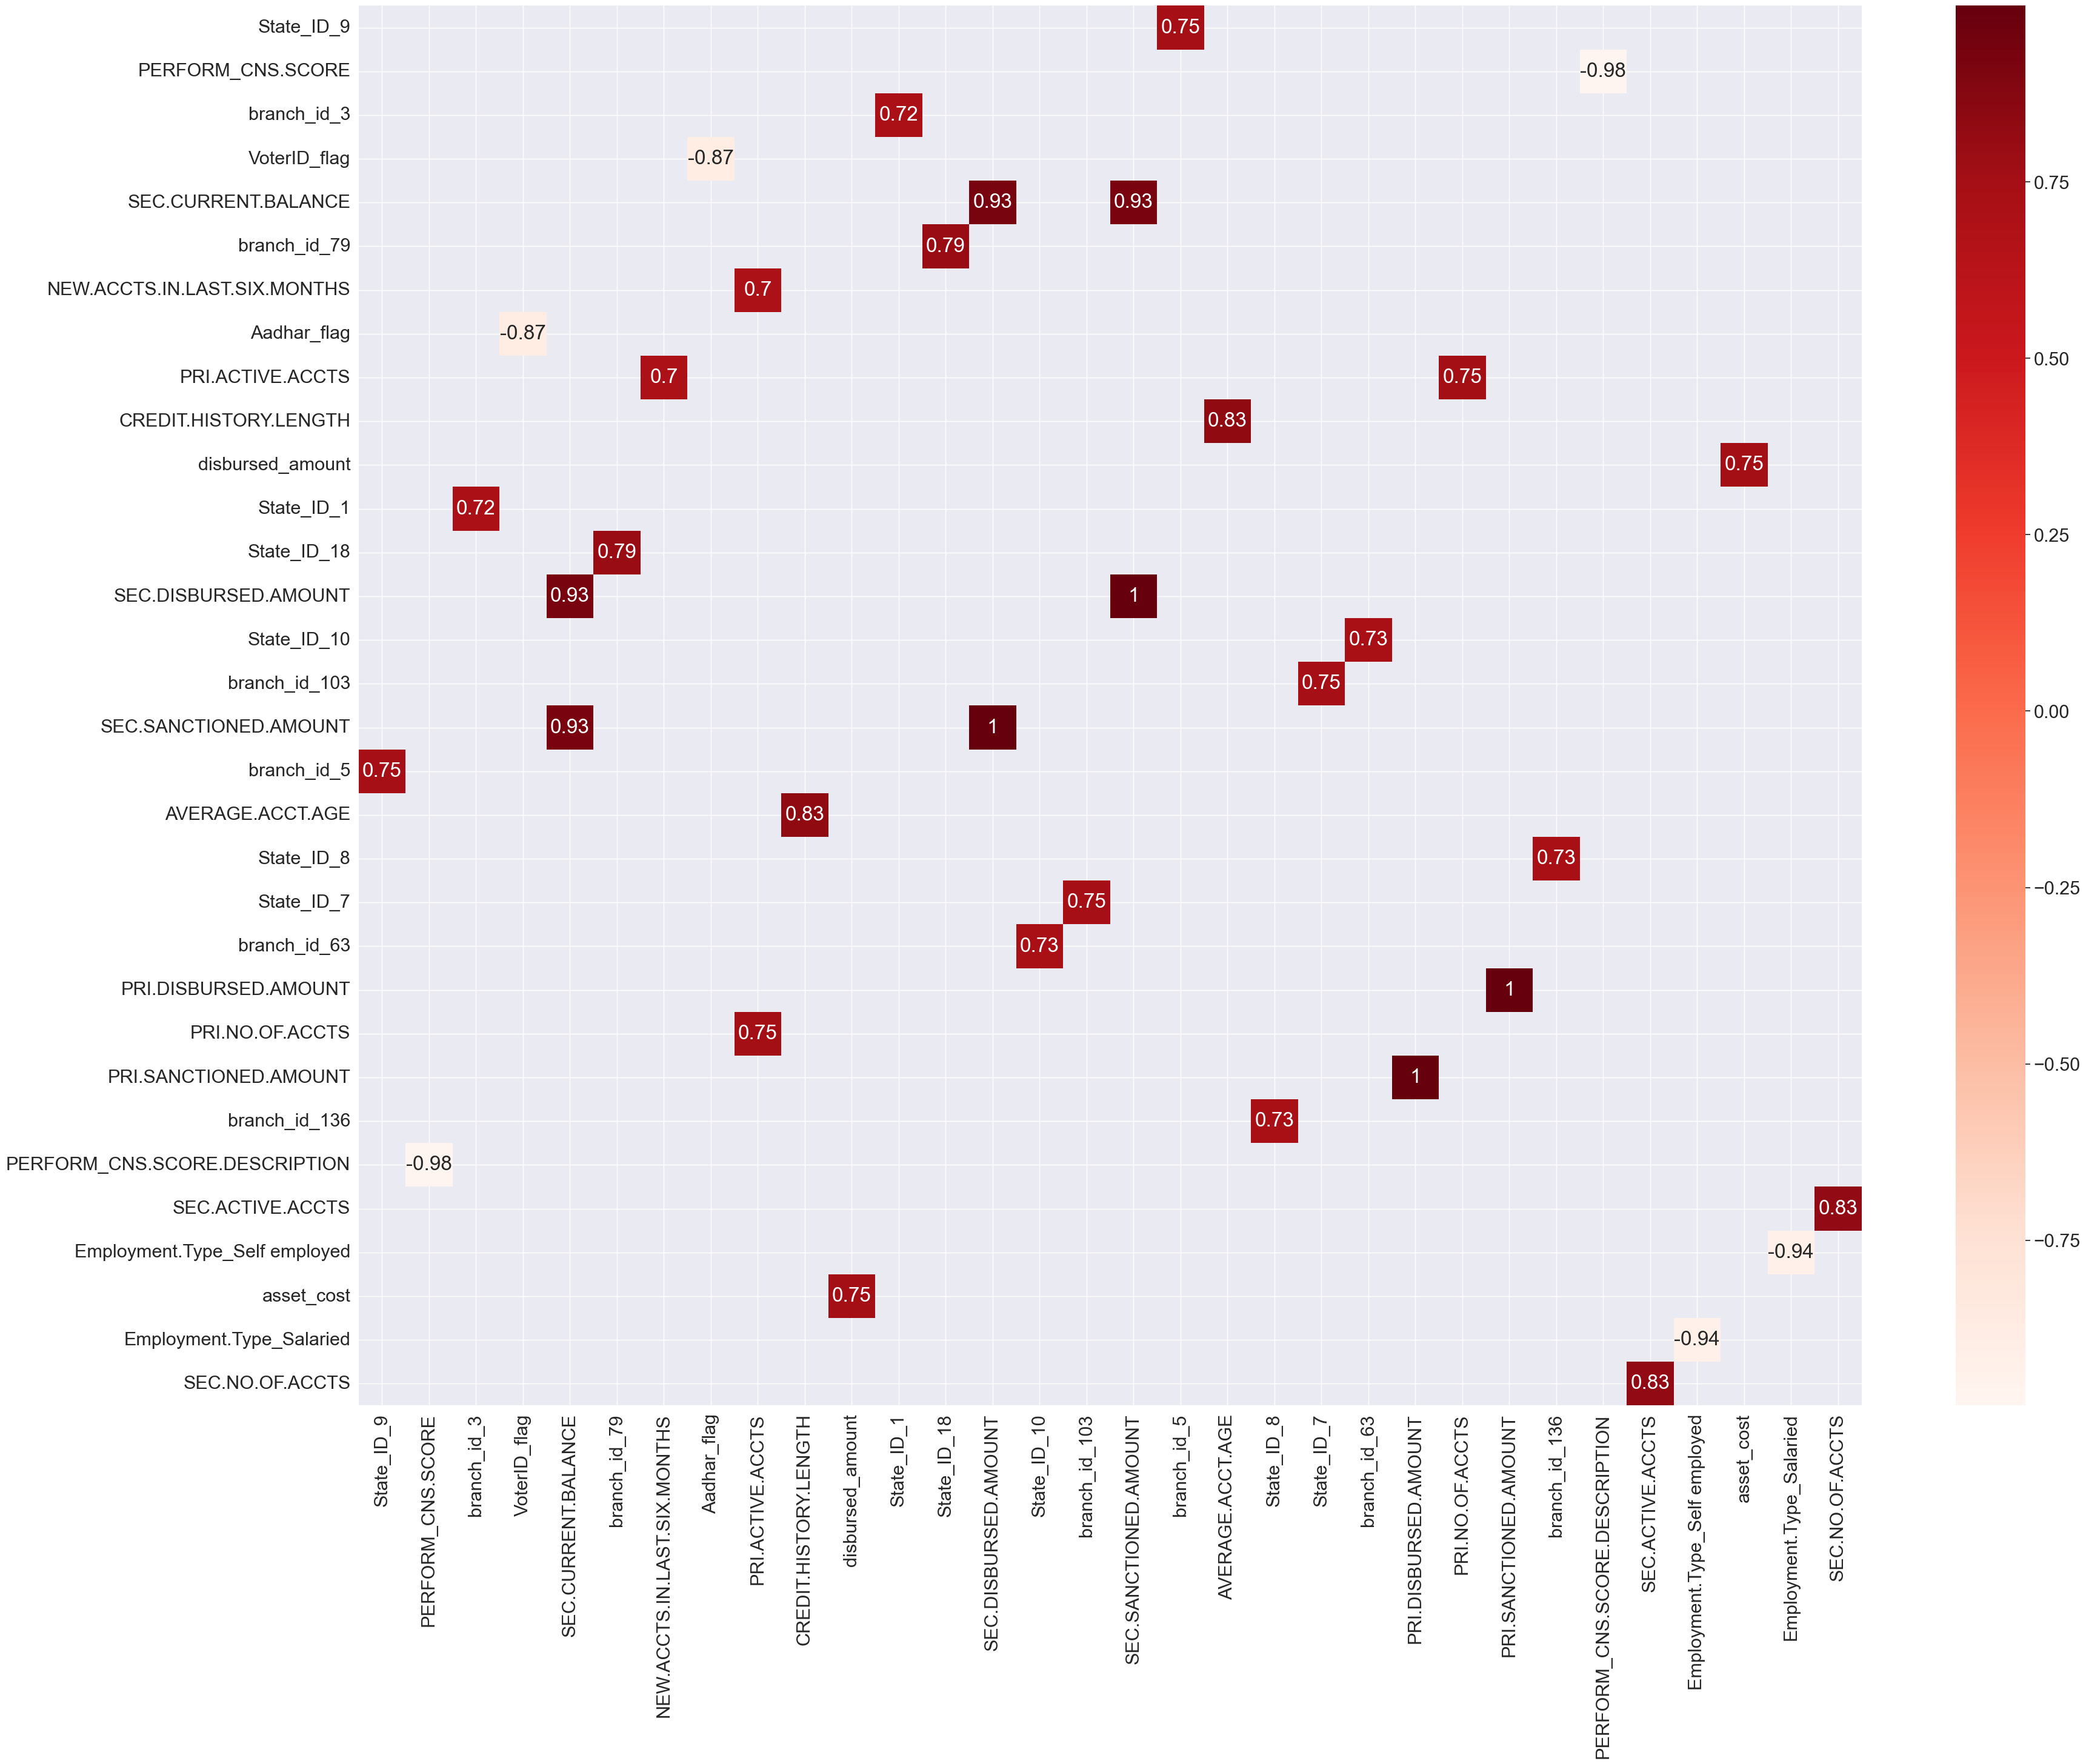

In [435]:
sb.set(font_scale=2)
filteredDf = filteredDf.loc[listaVar, listaVar]
plt.figure(figsize=(40,30))
sb.heatmap(filteredDf, annot=True, cmap="Reds")
plt.grid(True)
plt.show()

In [436]:
 # sve preko 0.9 izbacujemo i to su 'PRI.SANCTIONED.AMOUNT', 'PERFORM_CNS.SCORE', 'PRI.SANCTIONED.AMOUNT', 'SEC.SANCTIONED.AMOUNT'

In [437]:
listaVar = list(set(listaVar) - {'PRI.SANCTIONED.AMOUNT', 'PERFORM_CNS.SCORE', 'PRI.SANCTIONED.AMOUNT', 'SEC.SANCTIONED.AMOUNT', 'SEC.CURRENT.BALANCE'})

In [438]:
listaVar

['State_ID_9',
 'branch_id_3',
 'branch_id_79',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'Aadhar_flag',
 'PRI.ACTIVE.ACCTS',
 'CREDIT.HISTORY.LENGTH',
 'disbursed_amount',
 'State_ID_1',
 'State_ID_18',
 'SEC.DISBURSED.AMOUNT',
 'State_ID_10',
 'asset_cost',
 'branch_id_103',
 'branch_id_5',
 'AVERAGE.ACCT.AGE',
 'State_ID_8',
 'State_ID_7',
 'branch_id_63',
 'PRI.DISBURSED.AMOUNT',
 'PRI.NO.OF.ACCTS',
 'branch_id_136',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'SEC.ACTIVE.ACCTS',
 'Employment.Type_Self employed',
 'VoterID_flag',
 'Employment.Type_Salaried',
 'SEC.NO.OF.ACCTS']

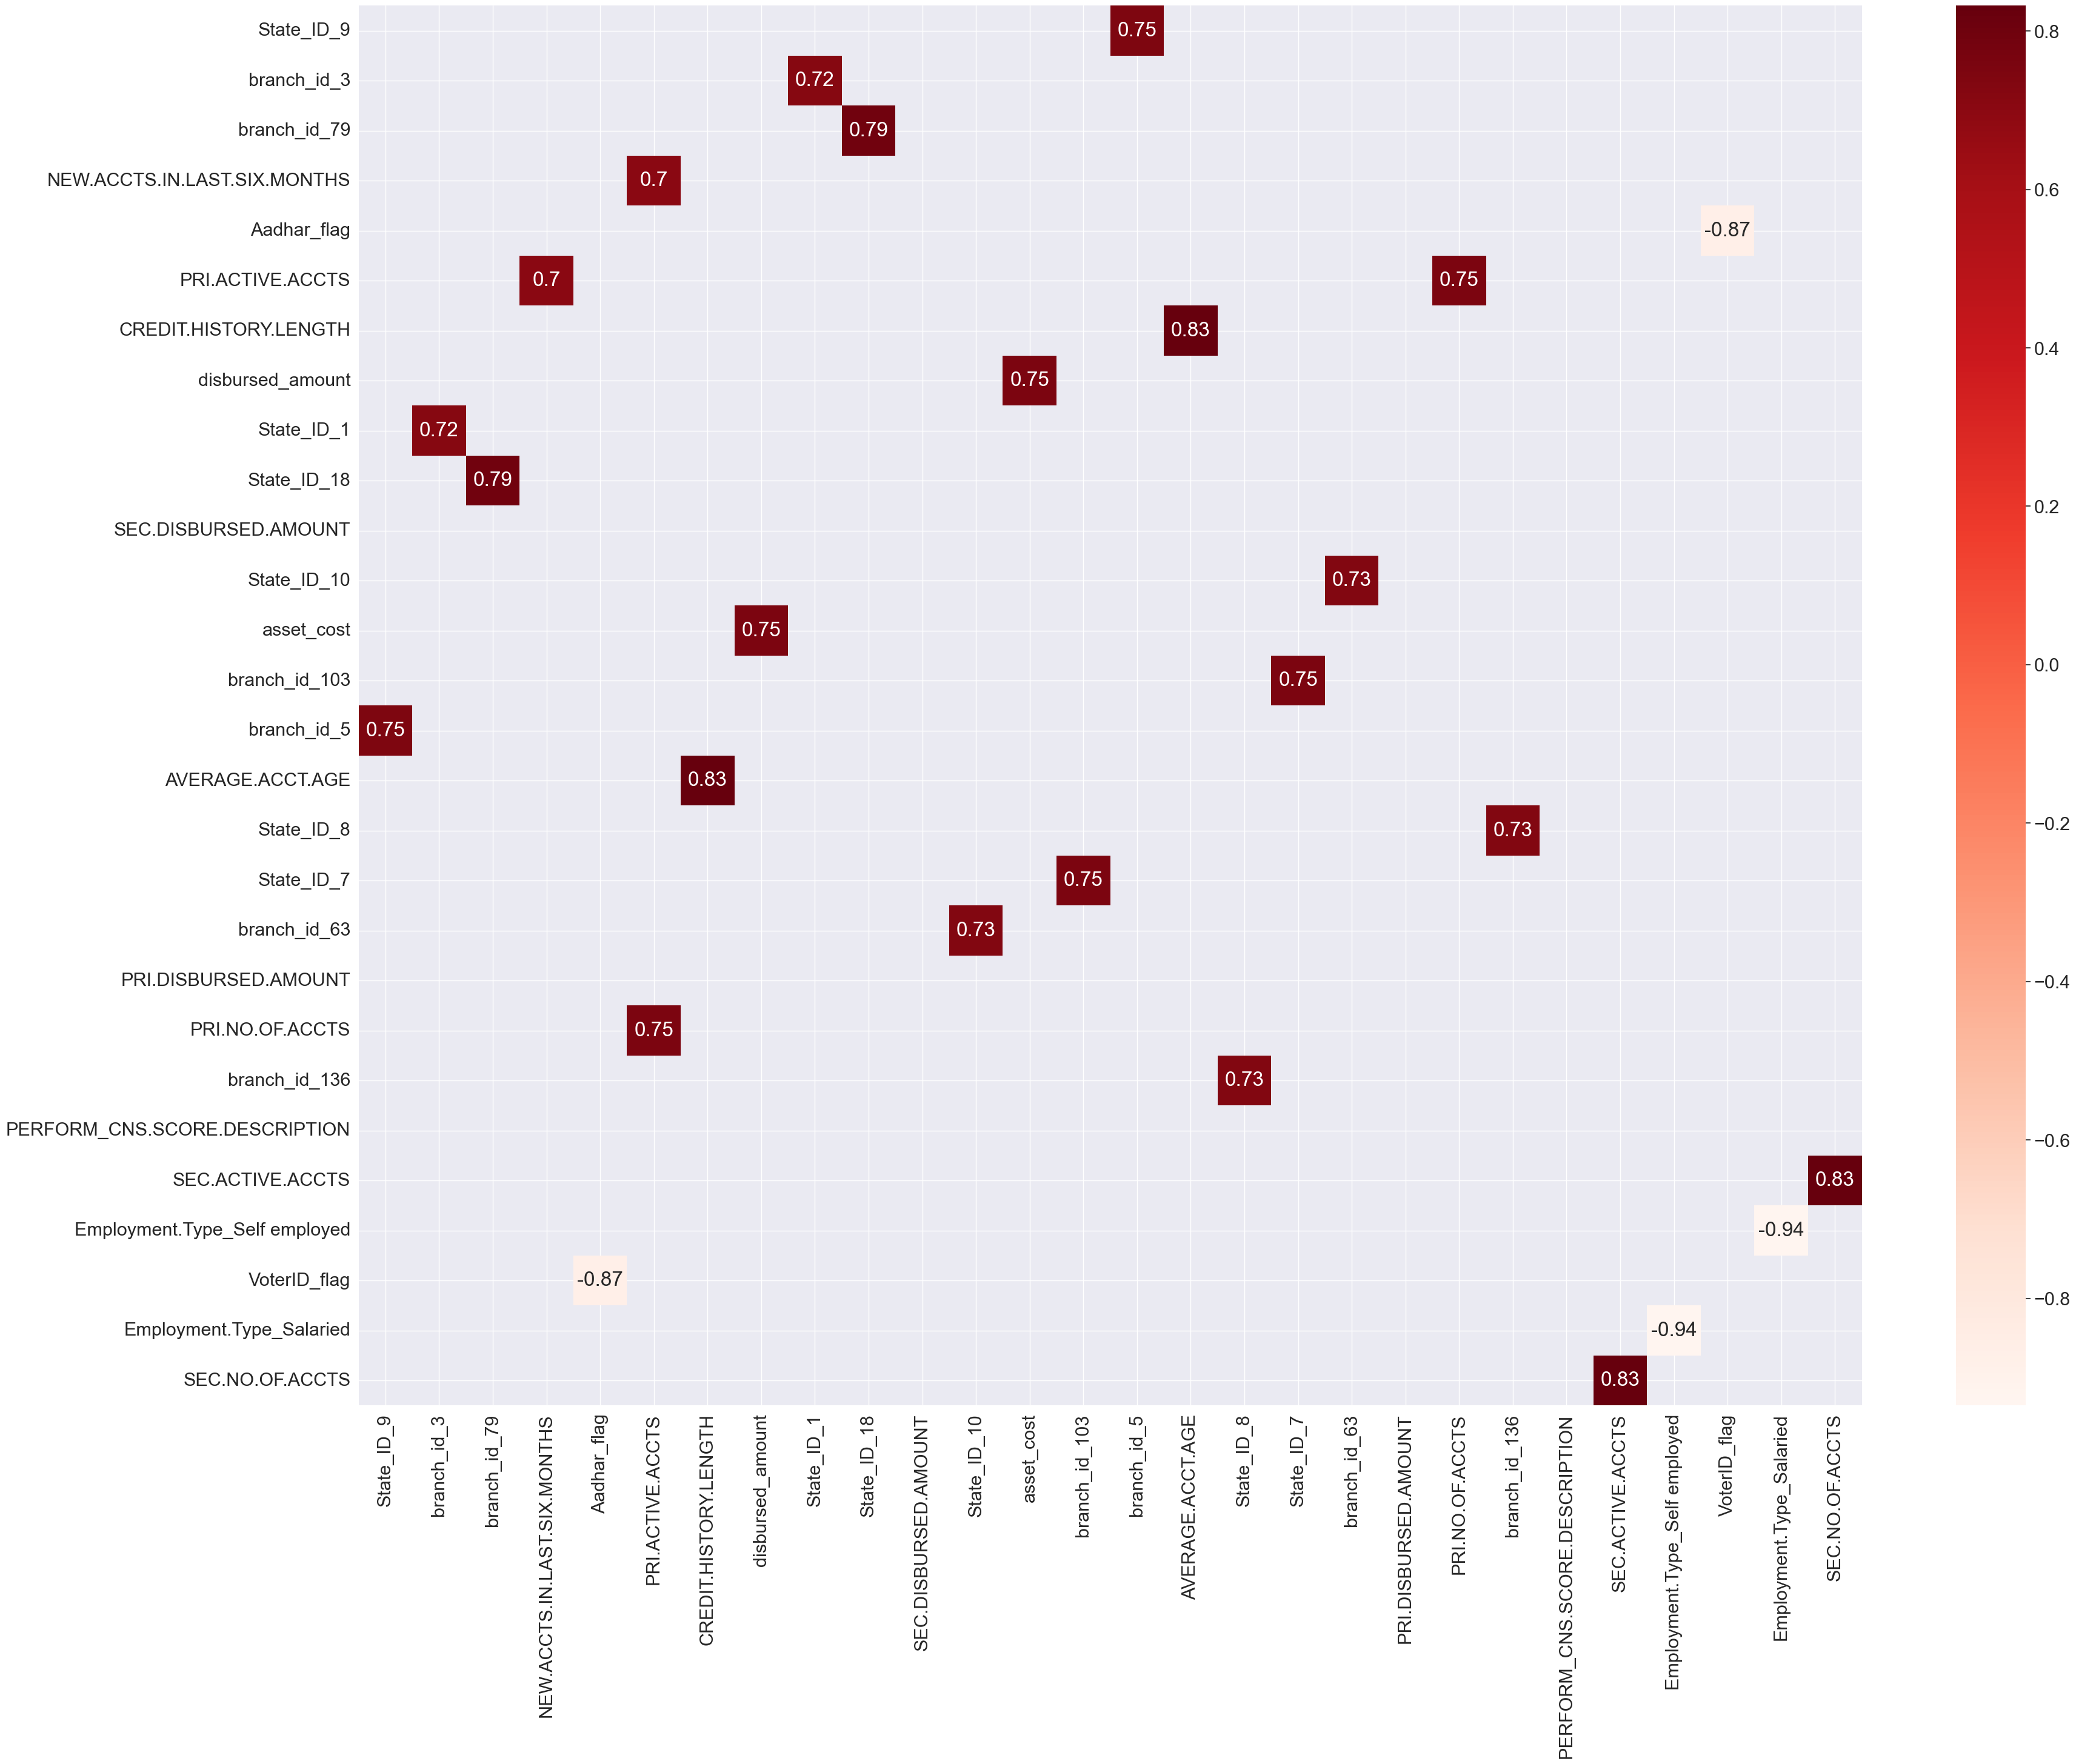

In [439]:
sb.set(font_scale=2)
filteredDf = filteredDf.loc[listaVar, listaVar]
plt.figure(figsize=(40,30))
sb.heatmap(filteredDf, annot=True, cmap="Reds")
plt.grid(True)
plt.show()

In [59]:
#izbacili smo visokokorelisane varijable

novaData = enkodiranaData.drop(columns=['PRI.SANCTIONED.AMOUNT', 'PERFORM_CNS.SCORE', 'PRI.SANCTIONED.AMOUNT', 'SEC.SANCTIONED.AMOUNT', 'SEC.CURRENT.BALANCE'])

In [441]:
novaData.sample(5)

,disbursed_amount,asset_cost,ltv,AgeOfCustomer,DaysPastSinceDisbursal,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,branch_id_1,branch_id_10,branch_id_100,branch_id_101,branch_id_103,branch_id_104,branch_id_105,branch_id_11,branch_id_111,branch_id_117,branch_id_120,branch_id_121,branch_id_13,branch_id_130,branch_id_135,branch_id_136,branch_id_138,branch_id_14,branch_id_142,branch_id_146,branch_id_147,branch_id_15,branch_id_152,branch_id_153,branch_id_158,branch_id_159,branch_id_16,branch_id_160,branch_id_162,branch_id_165,branch_id_17,branch_id_18,branch_id_19,branch_id_2,branch_id_20,branch_id_202,branch_id_207,branch_id_217,branch_id_248,branch_id_249,branch_id_250,branch_id_251,branch_id_254,branch_id_255,branch_id_257,branch_id_258,branch_id_259,branch_id_260,branch_id_261,branch_id_29,branch_id_3,branch_id_34,branch_id_35,branch_id_36,branch_id_42,branch_id_43,branch_id_48,branch_id_5,branch_id_61,branch_id_62,branch_id_63,branch_id_64,branch_id_65,branch_id_66,branch_id_67,branch_id_68,branch_id_69,branch_id_7,branch_id_70,branch_id_72,branch_id_73,branch_id_74,branch_id_76,branch_id_77,branch_id_78,branch_id_79,branch_id_8,branch_id_82,branch_id_84,branch_id_85,branch_id_9,branch_id_97,manufacturer_id_120,manufacturer_id_145,manufacturer_id_152,manufacturer_id_153,manufacturer_id_156,manufacturer_id_45,manufacturer_id_48,manufacturer_id_49,manufacturer_id_51,manufacturer_id_67,manufacturer_id_86,Employment.Type_Salaried,Employment.Type_Self employed,Employment.Type_Unemployed,State_ID_1,State_ID_10,State_ID_11,State_ID_12,State_ID_13,State_ID_14,State_ID_15,State_ID_16,State_ID_17,State_ID_18,State_ID_19,State_ID_2,State_ID_20,State_ID_21,State_ID_22,State_ID_3,State_ID_4,State_ID_5,State_ID_6,State_ID_7,State_ID_8,State_ID_9
23329,48283,61425,83.03,30,1803,1,0,0,0,0,6,1,1,0,8870,8870,0,0,0,0,1546,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70898,48849,63345,78.14,29,1721,1,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
41633,34430,69528,51.78,46,1747,1,0,0,0,0,1,5,3,0,15610,34600,0,0,0,0,0,0,3,0,8,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
16676,60947,83949,75.05,27,1715,1,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
49313,31341,41451,79.61,64,1779,1,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Novo stablo - izbaceni neki atributi

In [60]:
x = novaData.drop(columns='loan_default')
y = novaData.loan_default

In [483]:
xtr, xtest, ytr, ytest = train_test_split(x, y, test_size=0.25, random_state=18)

In [484]:
model = DecisionTreeClassifier()

model.fit(xtr, ytr)
pred = model.predict(xtest)

In [485]:
# po kolonama predvidjeno, po redovima stvarno
# rez i dalje katastrofa

confusion_matrix(ytest, pred)

array([[35651, 10016],
       [ 9063,  3559]], dtype=int64)

In [486]:
print(f"Metrike evaluacije modela: tacnost {round(accuracy_score(ytest, pred), 4)}, preciznost {round(precision_score(ytest, pred), 4)}, odziv {round(recall_score(ytest, pred), 4)}")

Metrike evaluacije modela: tacnost 0.6727, preciznost 0.2622, odziv 0.282


In [487]:
f1_score(ytest, pred)

0.2717105012024278

In [488]:
roc_auc_score(ytest, pred)

0.5313205630834893

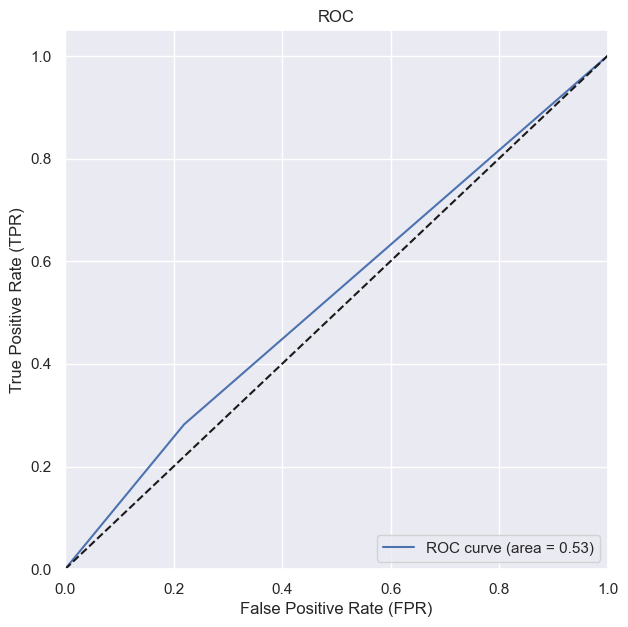

In [489]:
fpr, tpr, thresholds = roc_curve(ytest, pred)

roc_auc = auc(fpr, tpr)

sb.set(font_scale=1)
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### Radimo GridSearchCV za proveru najboljih hiperparametara

In [449]:
from sklearn.model_selection import GridSearchCV

In [450]:
grid_params = {
    'min_samples_leaf' : [3,4,5],
    'criterion' : ['entropy', 'gini']
}
gs = GridSearchCV(
    DecisionTreeClassifier(),
    grid_params,
    scoring=['precision', 'recall', 'f1', 'roc_auc'],
    refit='roc_auc',
    cv = 10)
gs_results = gs.fit(xtr,ytr)

KeyboardInterrupt: 

In [150]:
gs_results.best_score_

0.5485212270180748

In [151]:
pd.DataFrame(gs_results.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,split5_test_precision,split6_test_precision,split7_test_precision,split8_test_precision,split9_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,split5_test_recall,split6_test_recall,split7_test_recall,split8_test_recall,split9_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,split5_test_f1,split6_test_f1,split7_test_f1,split8_test_f1,split9_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,split5_test_roc_auc,split6_test_roc_auc,split7_test_roc_auc,split8_test_roc_auc,split9_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,7.251263,0.477236,0.058170,0.007218,entropy,3,"{'criterion': 'entropy', 'min_samples_leaf': 3}",0.260322,0.271055,0.264853,0.260590,0.273091,0.258133,0.257218,0.255582,0.261650,0.257288,0.261978,0.005651,6,0.255594,0.267702,0.264017,0.255857,0.269281,0.254871,0.257963,0.250066,0.257173,0.253225,0.258575,0.006008,1,0.257936,0.269368,0.264434,0.258202,0.271173,0.256492,0.257590,0.252794,0.259392,0.255240,0.260262,0.005763,1,0.539247,0.545062,0.539806,0.538676,0.543025,0.539294,0.537443,0.533756,0.539352,0.536908,0.539257,0.002960,6
1,6.903134,0.119087,0.055604,0.002160,entropy,4,"{'criterion': 'entropy', 'min_samples_leaf': 4}",0.269491,0.277615,0.269220,0.265242,0.279164,0.274602,0.260610,0.268674,0.267523,0.261272,0.269341,0.005955,3,0.241116,0.248750,0.244275,0.245064,0.253225,0.245392,0.229534,0.239537,0.241116,0.237957,0.242597,0.006111,4,0.254515,0.262391,0.256141,0.254754,0.265562,0.259177,0.244087,0.253270,0.253634,0.249070,0.255260,0.005862,4,0.543289,0.550536,0.546859,0.540930,0.554387,0.546794,0.541226,0.546138,0.542346,0.539698,0.545220,0.004418,4
2,6.754163,0.104712,0.054632,0.002367,entropy,5,"{'criterion': 'entropy', 'min_samples_leaf': 5}",0.264532,0.278031,0.264036,0.264333,0.281090,0.266686,0.271487,0.265195,0.263083,0.265347,0.268382,0.006039,4,0.247960,0.257173,0.250066,0.252435,0.260595,0.246182,0.246117,0.243485,0.244801,0.246907,0.249572,0.005298,3,0.255978,0.267195,0.256861,0.258247,0.270455,0.256024,0.258180,0.253877,0.253613,0.255795,0.258623,0.005351,3,0.549327,0.550789,0.545195,0.546734,0.555886,0.547994,0.547089,0.549247,0.544684,0.545927,0.548287,0.003131,2
3,6.546217,0.170841,0.057744,0.006270,gini,3,"{'criterion': 'gini', 'min_samples_leaf': 3}",0.264603,0.274664,0.253548,0.258387,0.257174,0.273908,0.272007,0.263070,0.264146,0.261513,0.264302,0.006855,5,0.258752,0.257963,0.244538,0.251382,0.250066,0.260927,0.261911,0.249013,0.259279,0.251119,0.254495,0.005651,2,0.261645,0.266051,0.248962,0.254837,0.253570,0.267260,0.266863,0.255849,0.261690,0.256211,0.259294,0.005987,2,0.542709,0.543161,0.533506,0.537168,0.536679,0.545725,0.543155,0.536543,0.537914,0.537968,0.539453,0.003724,5
4,6.461366,0.154271,0.055764,0.003644,gini,4,"{'criterion': 'gini', 'min_samples_leaf': 4}",0.268416,0.272073,0.263391,0.270794,0.267748,0.269119,0.273894,0.273899,0.275160,0.272437,0.270693,0.003392,1,0.223480,0.228744,0.218742,0.227955,0.230324,0.219589,0.224796,0.229271,0.238221,0.224533,0.226565,0.005391,6,0.243895,0.248534,0.238999,0.247535,0.247630,0.241844,0.246928,0.249606,0.255361,0.246176,0.246651,0.004236,6,0.545291,0.545230,0.542346,0.541209,0.541968,0.545502,0.544060,0.544981,0.552839,0.549962,0.545339,0.003418,3
5,6.660693,0.395370,0.059780,0.004579,gini,5,"{'criterion': 'gini', 'min_samples_leaf': 5}",0.271815,0.270360,0.253619,0.268212,0.271297,0.276129,0.272922,0.268138,0.272861,0.274838,0.270019,0.005982,2,0.235325,0.235062,0.221374,0.234535,0.240590,0.235124,0

# Nasumicne sume

In [451]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [452]:
suma = RandomForestClassifier(random_state=18)
suma.fit(xtr, ytr)

RandomForestClassifier(random_state=18)

In [453]:
predSuma = suma.predict(xtest)

In [454]:
confusion_matrix(ytest, predSuma)

array([[44878,   789],
       [12063,   559]], dtype=int64)

In [455]:
print(f"Metrike evaluacije modela: tacnost {round(accuracy_score(ytest, predSuma), 4)}, preciznost {round(precision_score(ytest, predSuma), 4)}, odziv {round(recall_score(ytest, predSuma), 4)}")

Metrike evaluacije modela: tacnost 0.7795, preciznost 0.4147, odziv 0.0443


In [456]:
f1_score(ytest, predSuma)

0.0800286327845383

In [457]:
roc_auc_score(ytest, predSuma)

0.5135052526967169

# Logisticka regresija

In [458]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [459]:
model = LogisticRegression(max_iter=500000)

In [460]:
xtr, xtest, ytr, ytest = train_test_split(x, y, test_size=0.25, random_state=18)

In [461]:
model.fit(xtr, ytr)

LogisticRegression(max_iter=500000)

In [462]:
pred = model.predict(xtest)

In [463]:
confusion_matrix(ytest, pred)

array([[45662,     5],
       [12621,     1]], dtype=int64)

In [464]:
pipe = Pipeline([("scale", StandardScaler()), ("model", LogisticRegression())])

In [465]:
pipe.fit(xtr, ytr)

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [466]:
pred2 = pipe.predict(xtest)

In [467]:
precSc = precision_score(ytest, pred2)
recSc = recall_score(ytest, pred2)
f1Sc = f1_score(ytest, pred2)

print(f"Preciznost: {round(precSc, 5)}, odziv: {round(recSc, 5)}, f1: {round(f1Sc, 5)}.")

Preciznost: 0.45128, odziv: 0.00697, f1: 0.01373.


In [468]:
confusion_matrix(ytest, pred2)

array([[45560,   107],
       [12534,    88]], dtype=int64)

In [69]:
hyperparams = {'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga']}

In [70]:
gsModel = GridSearchCV(estimator=LogisticRegression(max_iter=10000),
                      param_grid=hyperparams,
                      scoring={'accuracy', 'precision', 'recall'},
                      refit='recall',
                      cv=4)

In [ ]:
gsModel.fit(xtr, ytr)

# AdaBoost

In [469]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [490]:
x = novaData.drop(columns='loan_default')
y = novaData.loan_default

In [491]:
xtr, xtest, ytr, ytest = train_test_split(x, y, test_size=0.2, random_state=18)

In [492]:
pipe = Pipeline([("scale", MinMaxScaler()), ("model", AdaBoostClassifier())])

In [493]:
pipe.fit(xtr, ytr)

Pipeline(steps=[('scale', MinMaxScaler()), ('model', AdaBoostClassifier())])

In [494]:
pred = model.predict(xtest)

In [495]:
acc = accuracy_score(ytest, pred)
recall = recall_score(ytest, pred)
precision = precision_score(ytest, pred)

print(f"Tacnost: {acc}, preciznost: {precision} i odziv: {recall}")

Tacnost: 0.6718063091076751, preciznost: 0.26215102974828375 i odziv: 0.28336796279806076


In [496]:
confusion_matrix(ytest, pred)

array([[28463,  8061],
       [ 7243,  2864]], dtype=int64)

In [497]:
f1_score(ytest, pred)

0.27234689996196276

In [498]:
roc_auc_score(ytest, pred)

0.5313318841479078

In [499]:
from sklearn.metrics import roc_curve, auc

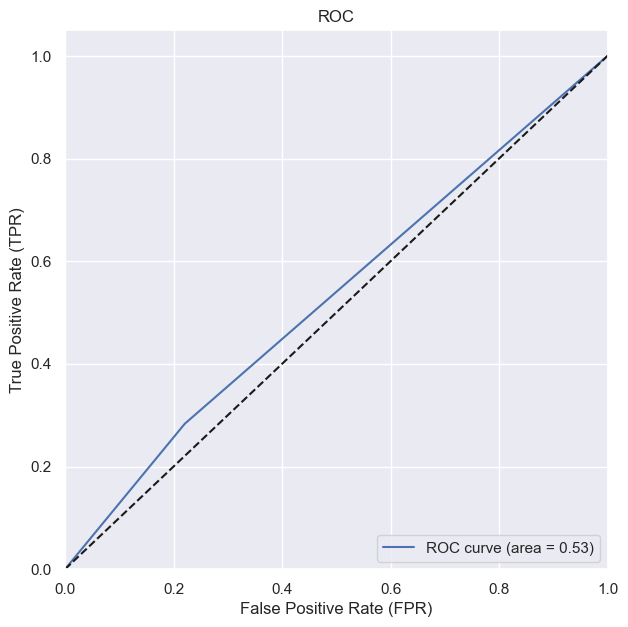

In [500]:
fpr, tpr, thresholds = roc_curve(ytest, pred)

roc_auc = auc(fpr, tpr)

sb.set(font_scale=1)
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [501]:
adaboost = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(adaboost,
                           param_grid,
                           cv=5,
                           scoring=['precision', 'recall', 'f1', 'roc_auc'],
                           refit='roc_auc')

In [197]:
grid_search.fit(xtr, ytr)

KeyboardInterrupt: 

In [ ]:
print("Najbolja vrednost roc_auc: ", grid_search.best_params_)

In [62]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

lasso.fit(xtr, ytr)

koeficijenti = lasso.coef_
atributi = xtr.columns

koefDf = pd.DataFrame({'Atributi': atributi, 'Koeficijenti': koeficijenti})
print(koefDf)

                                Atributi  Koeficijenti
0                       disbursed_amount  5.102847e-06
1                             asset_cost -2.476177e-06
2                                    ltv  0.000000e+00
3                          AgeOfCustomer -8.389429e-05
4                 DaysPastSinceDisbursal -1.619794e-04
5                            Aadhar_flag -0.000000e+00
6                               PAN_flag  0.000000e+00
7                           VoterID_flag  0.000000e+00
8                           Driving_flag -0.000000e+00
9                          Passport_flag -0.000000e+00
10                     PERFORM_CNS.SCORE -7.113866e-05
11         PERFORM_CNS.SCORE.DESCRIPTION  0.000000e+00
12                       PRI.NO.OF.ACCTS -0.000000e+00
13                      PRI.ACTIVE.ACCTS -0.000000e+00
14                     PRI.OVERDUE.ACCTS  0.000000e+00
15                   PRI.CURRENT.BALANCE -8.845603e-09
16                 PRI.SANCTIONED.AMOUNT -8.265305e-09
17        

In [67]:
kol = koefDf.loc[abs(koefDf.Koeficijenti) != 0, 'Atributi']

In [68]:
kol

0           disbursed_amount
1                 asset_cost
3              AgeOfCustomer
4     DaysPastSinceDisbursal
10         PERFORM_CNS.SCORE
15       PRI.CURRENT.BALANCE
16     PRI.SANCTIONED.AMOUNT
17      PRI.DISBURSED.AMOUNT
21       SEC.CURRENT.BALANCE
22     SEC.SANCTIONED.AMOUNT
23      SEC.DISBURSED.AMOUNT
24        PRIMARY.INSTAL.AMT
25            SEC.INSTAL.AMT
29     CREDIT.HISTORY.LENGTH
Name: Atributi, dtype: object

In [73]:
selektData = enkodiranaData.loc[:,kol]

In [74]:
selektData.columns

Index(['disbursed_amount', 'asset_cost', 'AgeOfCustomer',
       'DaysPastSinceDisbursal', 'PERFORM_CNS.SCORE', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'CREDIT.HISTORY.LENGTH'],
      dtype='object')

In [75]:
xtr, xtest, ytr, ytest = train_test_split(selektData, y, test_size=0.25, random_state=18)

In [76]:
model = DecisionTreeClassifier()

model.fit(xtr, ytr)
pred = model.predict(xtest)

In [77]:
confusion_matrix(ytest, pred)

array([[35489, 10178],
       [ 9213,  3409]], dtype=int64)

In [78]:
print(f"Metrike evaluacije modela: tacnost {round(accuracy_score(ytest, pred), 4)}, preciznost {round(precision_score(ytest, pred), 4)}, odziv {round(recall_score(ytest, pred), 4)}")

Metrike evaluacije modela: tacnost 0.6673, preciznost 0.2509, odziv 0.2701


In [80]:
f1_score(ytest, pred)

0.26013964668625283

In [81]:
roc_auc_score(ytest, pred)

0.5236048473813052